## MA 544 Spring 2021: Programming Assignment - 4
---


In [18]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn import decomposition

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(100)
%matplotlib inline


### Question 1
---
Find the nonnegative basis representation of images from one of the following databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [19]:
# Your code starts here
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

Dimensions: (199, 115, 115)


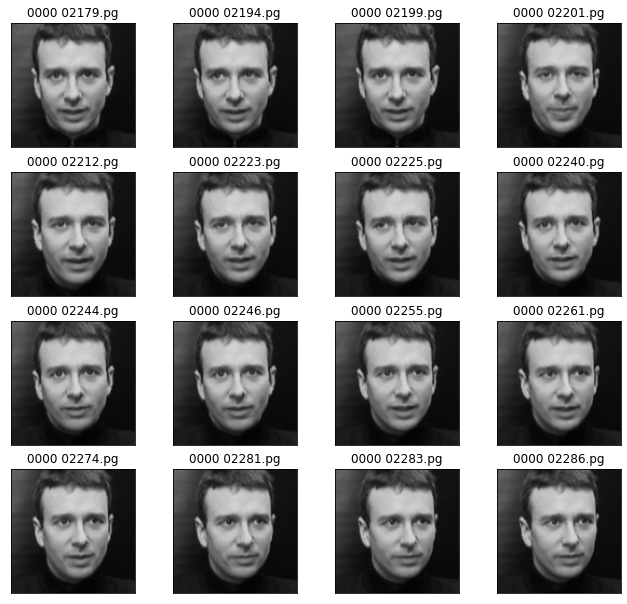

In [20]:
dir='data/test'
test_photos=os.listdir(dir)[1:200]
test_images=[dir+'/' + photo for photo in test_photos]
images=np.array([plt.imread(image) for image in test_images], dtype=np.float64)
test_names=[name[:name.find('0')-1].replace("_", " ") for name in test_photos]
n_samples, h, w = images.shape
print("Dimensions:",images.shape)
plot_portraits(images, test_names, h, w, n_row=4, n_col=4)

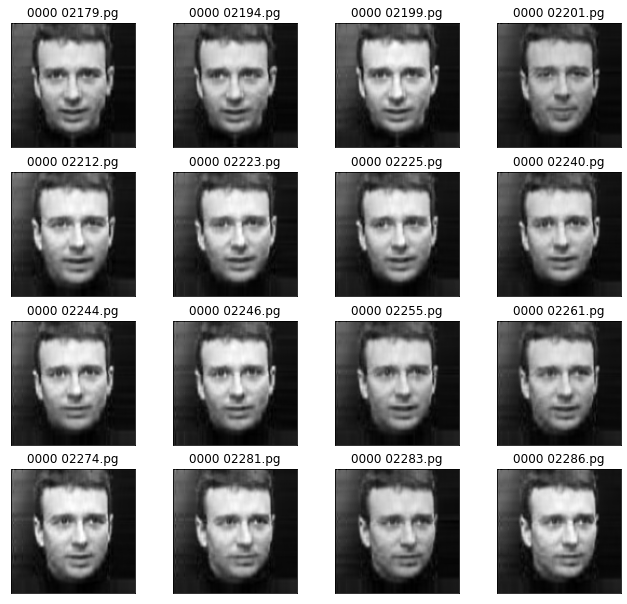

In [21]:
for i in range(16):
    estimator = decomposition.NMF(n_components = 16, init = 'random', tol=5e-3)    
    W = estimator.fit_transform(images[i])
    H = estimator.components_
    new_img = np.dot(W,H)
    images[i] = new_img
plot_portraits(images, test_names, h, w, n_row=4, n_col=4)

### Question 2
---
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/).  Discard the categorical data.

>1. Analyze the data to get relevant insight.
>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.
>1. Improve the performance of your model on the test data.

In [22]:
# Your code comes here
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
             'model year', 'origin', 'car name' ]
data = pd.read_csv('./data/auto-mpg.data', delim_whitespace=True, names=col_names)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 24.9+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [23]:
#horsepower should not be an object but a float (locate problematic data)
horsepower_missing_index = data[data.horsepower=='?'].index
data.loc[horsepower_missing_index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [24]:
# fill the missing horsepowers with the mean horsepower of the rest of the data
#data.loc[horsepower_missing_index, 'horsepower'] = float('nan') 
#data.horsepower = data.horsepower.apply(pd.to_numeric)
#data.loc[horsepower_missing_index, 'horsepower'] = float(data.horsepower.mean())
#data.info()

In [25]:
#remove the data with the missing horsepower
data.loc[horsepower_missing_index, 'horsepower'] = float('nan') 
data.horsepower = data.horsepower.apply(pd.to_numeric)
data.drop(horsepower_missing_index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 29.1+ KB


In [26]:
# drop categorical data (objects and multi-valued discrete)
data.drop(columns= ['car name','cylinders', 'model year', 'origin'], inplace=True)

In [27]:
data.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


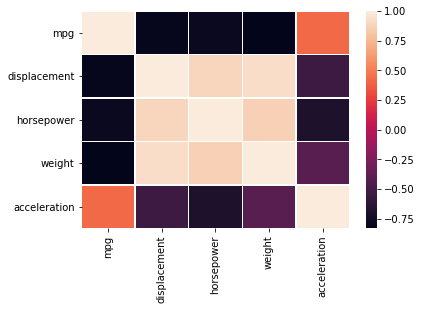

In [28]:
ax = sns.heatmap(data.corr(), linewidths=.5)

In [29]:
#Step[0] Bring the data in a matrix
data_mat = data.values
print (data_mat.shape)

(392, 5)


In [30]:
#Step[1] Split Data into Train and Test subsets: WHY?
X = data_mat[:,1:5]
y = data_mat[:,0]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)
print (X.shape)
print (y.shape)

(392, 4)
(392,)


In [31]:
#Step[2] Preprocess: Normalize the Features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train) # Is built on training data
X_test_n = scaler.transform(X_test) # Same normalizer used for test dataa too

In [32]:
# Create Linear Regression Model
lr = LinearRegression()

In [33]:
# TRAIN THE MODEL
lr.fit(X_train_n, y_train)

LinearRegression()

In [34]:
# WHAT ARE THESE COEFFICIENTS and INTERCEPTS?
print (lr.coef_)
print (lr.intercept_)

[ -2.59965958  -8.71497148 -17.25110031   0.16609723]
34.120383660160826


In [35]:
# Predict on some new values of x
y_pred = lr.predict(X_test_n)
print (np.round(y_pred[1:10],2))
print (y_test[1:10])

[31.34 30.94 24.57 24.39 13.07 30.75 19.62 25.82 22.88]
[26.  31.5 20.2 30.  14.  36.  16.  27.  19. ]


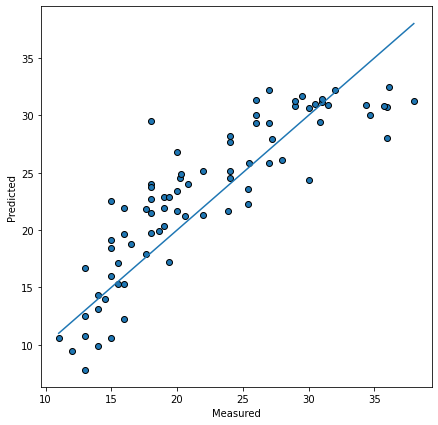

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
# R^2 : Coefficient of determination. Goodness of fit
print ("R-squared for the training data: ",lr.score(X_train_n, y_train))
print ("R-squared for the test data: ",lr.score(X_test_n, y_test))

R-squared for the training data:  0.7002266889564714
R-squared for the test data:  0.7243957813124879


### Question 3
---
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

>1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
>1. Analyze the data to get relevant insight.
>2. Get feature matrix X, and target variable y (>50k or <50k)
>3. Split data into training and testing
>4. Normalize data using MinMaxScaler
>5. Creat a LogisticRegression object for modeling
>6. Train the model with training data
>7. Compare the precision, recall, and F1-score on the train and test data.
>1. Improve the performance of your model on the test data.

In [38]:
# Your code comes here
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 
             'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 
             'hoursPerWeek', 'nativeCountry', 'classification']
adult = pd.read_csv('./data/adult.data', sep=', ', names=col_names, engine='python')
adult.info()
#adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educationNum    32561 non-null  int64 
 5   maritalStatus   32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalGain     32561 non-null  int64 
 11  capitalLoss     32561 non-null  int64 
 12  hoursPerWeek    32561 non-null  int64 
 13  nativeCountry   32561 non-null  object
 14  classification  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [39]:
#make dummy variables of objects
#workclass
adult = pd.concat([adult,pd.get_dummies(adult['workclass'], prefix='wc')],axis=1)
adult.drop(['workclass'],axis=1, inplace=True)
#education
adult = pd.concat([adult,pd.get_dummies(adult['education'], prefix='ed')],axis=1)
adult.drop(['education'],axis=1, inplace=True)
#maritalStatus
adult = pd.concat([adult,pd.get_dummies(adult['maritalStatus'], prefix='ms')],axis=1)
adult.drop(['maritalStatus'],axis=1, inplace=True)
#occupation
adult = pd.concat([adult,pd.get_dummies(adult['occupation'], prefix='occ')],axis=1)
adult.drop(['occupation'],axis=1, inplace=True)
#relationship
adult = pd.concat([adult,pd.get_dummies(adult['relationship'], prefix='rel')],axis=1)
adult.drop(['relationship'],axis=1, inplace=True)
#race
adult = pd.concat([adult,pd.get_dummies(adult['race'], prefix='race')],axis=1)
adult.drop(['race'],axis=1, inplace=True)
#sex
adult = pd.concat([adult,pd.get_dummies(adult['sex'], prefix='sex')],axis=1)
adult.drop(['sex'],axis=1, inplace=True)
#nativeCountry
adult = pd.concat([adult,pd.get_dummies(adult['nativeCountry'], prefix='nc')],axis=1)
adult.drop(['nativeCountry'],axis=1, inplace=True)
#classification
adult = pd.concat([adult,pd.get_dummies(adult['classification'], prefix='class')],axis=1)
adult.drop(['classification'],axis=1, inplace=True)


#adult.head(10)

In [40]:
#delate the colume class_<=50K
adult.drop(columns=['class_<=50K'], inplace=True)
#rename the column class_>50K to classification
adult.rename(columns={'class_>50K':'classification'}, inplace=False)
#now if classification=0 then income <=50K and if classification=1 then income >50K

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek,wc_?,wc_Federal-gov,wc_Local-gov,wc_Never-worked,...,nc_Puerto-Rico,nc_Scotland,nc_South,nc_Taiwan,nc_Thailand,nc_Trinadad&Tobago,nc_United-States,nc_Vietnam,nc_Yugoslavia,classification
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


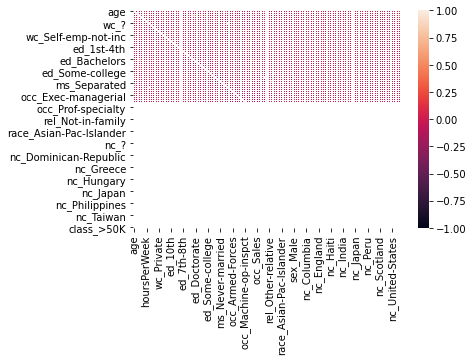

In [41]:
az = sns.heatmap(adult.corr(), linewidths=.5)

In [42]:
#Step[0] Bring the data in a matrix
adult_mat = adult.values
print (adult_mat.shape)

(32561, 109)


In [43]:
#Step[1] Split Data into Train and Test subsets: WHY?
X2 = adult_mat[:,0:108]
y2 = adult_mat[:,108]
X2_train, X2_test, y2_train, y2_test  = train_test_split(X2, y2, test_size=0.2, random_state=100)
print (X2.shape)
print (y2.shape)

(32561, 108)
(32561,)


In [44]:
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [45]:
model = LogisticRegression()
model.fit(X2_train, y2_train)

LogisticRegression()

In [46]:
# WHAT ARE THESE COEFFICIENTS and INTERCEPTS?
print (model.coef_)
print (model.intercept_)

[[ 3.42854092e-01  8.29254178e-02  3.51821087e-01  2.29002813e+00
   2.42783887e-01  3.80893162e-01 -6.00348239e-02  1.02211037e-01
  -1.33005934e-02 -7.47179681e-02  5.64824847e-02  4.82860152e-02
  -8.77223548e-02 -3.77485592e-02 -1.39967117e-01 -9.47278598e-02
  -1.28797335e-01 -4.69732420e-02 -1.43592903e-02 -3.88320480e-02
  -1.21534240e-01 -7.64021844e-02 -2.00543947e-02  3.73599368e-02
   1.50018430e-01  1.07449169e-01 -8.59911058e-02  1.39111658e-01
  -2.20700236e-01  1.38407887e-01  1.46573791e-02 -1.81433092e-01
   4.53944241e-02  6.54680019e-01 -5.07391226e-02 -4.81504814e-01
  -1.28568240e-01 -6.31134250e-02 -6.43682608e-02 -8.04921459e-03
  -8.66169201e-02  2.56948049e-02  2.58773465e-01 -1.74461038e-01
  -1.33495961e-01 -7.28049740e-02 -2.60715846e-01 -2.71312450e-01
   1.40627438e-01  8.78500405e-02  8.14921235e-02  1.08408442e-01
  -2.43578997e-02  3.02745702e-02  1.16565087e-01 -7.83214304e-02
  -3.43910618e-01  2.61286462e-02  3.00542490e-01 -4.86836124e-02
   4.37233

In [47]:
# Predict on some new values of x
y2_pred = model.predict(X2_test)
print (np.round(y2_pred[1:10],2))
print (y2_test[1:10])


[0 0 0 0 0 0 1 0 1]
[0 1 0 0 0 0 1 0 1]


In [48]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X2_test, y2_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [49]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4908
           1       0.75      0.60      0.66      1605

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

